# Πρόκληση: Ανάλυση Κειμένου για την Επιστήμη Δεδομένων

Σε αυτό το παράδειγμα, ας κάνουμε μια απλή άσκηση που καλύπτει όλα τα βήματα μιας παραδοσιακής διαδικασίας επιστήμης δεδομένων. Δεν χρειάζεται να γράψετε κώδικα, μπορείτε απλώς να κάνετε κλικ στα παρακάτω κελιά για να τα εκτελέσετε και να παρατηρήσετε το αποτέλεσμα. Ως πρόκληση, σας ενθαρρύνουμε να δοκιμάσετε αυτόν τον κώδικα με διαφορετικά δεδομένα.

## Στόχος

Σε αυτό το μάθημα, συζητήσαμε διάφορες έννοιες που σχετίζονται με την Επιστήμη Δεδομένων. Ας προσπαθήσουμε να ανακαλύψουμε περισσότερες σχετικές έννοιες κάνοντας **εξόρυξη κειμένου**. Θα ξεκινήσουμε με ένα κείμενο για την Επιστήμη Δεδομένων, θα εξάγουμε λέξεις-κλειδιά από αυτό και στη συνέχεια θα προσπαθήσουμε να οπτικοποιήσουμε το αποτέλεσμα.

Ως κείμενο, θα χρησιμοποιήσω τη σελίδα για την Επιστήμη Δεδομένων από τη Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Βήμα 1: Απόκτηση Δεδομένων

Το πρώτο βήμα σε κάθε διαδικασία επιστήμης δεδομένων είναι η απόκτηση των δεδομένων. Θα χρησιμοποιήσουμε τη βιβλιοθήκη `requests` για να το κάνουμε:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Βήμα 2: Μετατροπή των Δεδομένων

Το επόμενο βήμα είναι να μετατρέψουμε τα δεδομένα σε μορφή κατάλληλη για επεξεργασία. Στην περίπτωσή μας, έχουμε κατεβάσει τον πηγαίο κώδικα HTML από τη σελίδα και πρέπει να τον μετατρέψουμε σε απλό κείμενο.

Υπάρχουν πολλοί τρόποι για να γίνει αυτό. Θα χρησιμοποιήσουμε το πιο απλό ενσωματωμένο αντικείμενο [HTMLParser](https://docs.python.org/3/library/html.parser.html) από τη Python. Πρέπει να υποκλάσουμε την κλάση `HTMLParser` και να ορίσουμε τον κώδικα που θα συλλέγει όλο το κείμενο μέσα στις ετικέτες HTML, εκτός από τις ετικέτες `<script>` και `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Βήμα 3: Απόκτηση Ενδείξεων

Το πιο σημαντικό βήμα είναι να μετατρέψουμε τα δεδομένα μας σε μια μορφή από την οποία μπορούμε να αντλήσουμε ενδείξεις. Στην περίπτωσή μας, θέλουμε να εξάγουμε λέξεις-κλειδιά από το κείμενο και να δούμε ποιες λέξεις-κλειδιά είναι πιο σημαντικές.

Θα χρησιμοποιήσουμε τη βιβλιοθήκη Python που ονομάζεται [RAKE](https://github.com/aneesha/RAKE) για την εξαγωγή λέξεων-κλειδιών. Πρώτα, ας εγκαταστήσουμε αυτή τη βιβλιοθήκη σε περίπτωση που δεν είναι ήδη εγκατεστημένη:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Η κύρια λειτουργικότητα είναι διαθέσιμη από το αντικείμενο `Rake`, το οποίο μπορούμε να προσαρμόσουμε χρησιμοποιώντας ορισμένες παραμέτρους. Στην περίπτωσή μας, θα ορίσουμε το ελάχιστο μήκος μιας λέξης-κλειδί σε 5 χαρακτήρες, την ελάχιστη συχνότητα μιας λέξης-κλειδί στο έγγραφο σε 3, και τον μέγιστο αριθμό λέξεων σε μια λέξη-κλειδί - σε 2. Μη διστάσετε να πειραματιστείτε με άλλες τιμές και να παρατηρήσετε το αποτέλεσμα.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Αποκτήσαμε μια λίστα όρων μαζί με τον αντίστοιχο βαθμό σημασίας. Όπως μπορείτε να δείτε, οι πιο σημαντικοί κλάδοι, όπως η μηχανική μάθηση και τα μεγάλα δεδομένα, βρίσκονται στις κορυφαίες θέσεις της λίστας.

## Βήμα 4: Οπτικοποίηση του Αποτελέσματος

Οι άνθρωποι μπορούν να ερμηνεύσουν καλύτερα τα δεδομένα σε οπτική μορφή. Επομένως, συχνά έχει νόημα να οπτικοποιούμε τα δεδομένα για να εξάγουμε κάποιες πληροφορίες. Μπορούμε να χρησιμοποιήσουμε τη βιβλιοθήκη `matplotlib` στην Python για να σχεδιάσουμε μια απλή κατανομή των λέξεων-κλειδιών με τη σημασία τους:


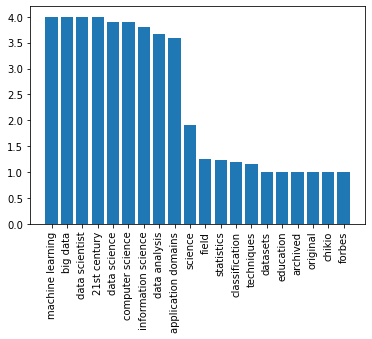

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Υπάρχει, ωστόσο, ένας ακόμη καλύτερος τρόπος να οπτικοποιήσουμε τις συχνότητες λέξεων - χρησιμοποιώντας **Word Cloud**. Θα χρειαστεί να εγκαταστήσουμε μια άλλη βιβλιοθήκη για να δημιουργήσουμε το word cloud από τη λίστα των λέξεων-κλειδιών μας.


In [71]:
!{sys.executable} -m pip install wordcloud

`Το αντικείμενο WordCloud είναι υπεύθυνο για τη λήψη είτε του αρχικού κειμένου, είτε μιας προϋπολογισμένης λίστας λέξεων με τις συχνότητές τους, και επιστρέφει μια εικόνα, η οποία μπορεί στη συνέχεια να εμφανιστεί χρησιμοποιώντας το matplotlib:`


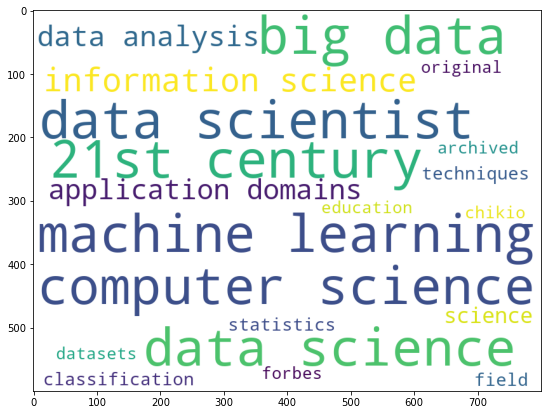

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Μπορούμε επίσης να περάσουμε το αρχικό κείμενο στο `WordCloud` - ας δούμε αν μπορούμε να έχουμε παρόμοιο αποτέλεσμα:


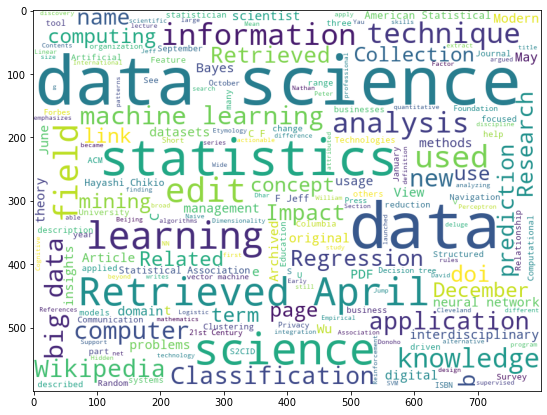

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Μπορείτε να δείτε ότι το word cloud τώρα φαίνεται πιο εντυπωσιακό, αλλά περιέχει επίσης πολύ θόρυβο (π.χ. άσχετες λέξεις όπως `Retrieved on`). Επίσης, λαμβάνουμε λιγότερες λέξεις-κλειδιά που αποτελούνται από δύο λέξεις, όπως *data scientist* ή *computer science*. Αυτό συμβαίνει επειδή ο αλγόριθμος RAKE κάνει πολύ καλύτερη δουλειά στην επιλογή καλών λέξεων-κλειδιών από το κείμενο. Αυτό το παράδειγμα υπογραμμίζει τη σημασία της προεπεξεργασίας και του καθαρισμού των δεδομένων, καθώς μια καθαρή εικόνα στο τέλος θα μας επιτρέψει να πάρουμε καλύτερες αποφάσεις.

Σε αυτή την άσκηση περάσαμε από μια απλή διαδικασία εξαγωγής νοήματος από κείμενο της Wikipedia, με τη μορφή λέξεων-κλειδιών και word cloud. Αυτό το παράδειγμα είναι αρκετά απλό, αλλά δείχνει καλά όλα τα τυπικά βήματα που θα ακολουθήσει ένας data scientist όταν εργάζεται με δεδομένα, ξεκινώντας από την απόκτηση δεδομένων μέχρι την οπτικοποίηση.

Στο μάθημά μας θα συζητήσουμε όλα αυτά τα βήματα με λεπτομέρεια.



---

**Αποποίηση ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης AI [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε προσπάθειες για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτόματες μεταφράσεις ενδέχεται να περιέχουν λάθη ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
